In [2]:
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# print(plt.style.available)

In [4]:
# reading our dataframe
rawdf = pd.read_csv('exam_data.csv')
rawdf.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-19 20:50:15,2016-02-19 21:10:20,1,11.20,-73.864700,40.770416,1,N,...,32.5,0.5,0.5,9.80,5.54,0.3,49.14,True,True,False
1,2,2,2016-02-19 20:50:53,2016-02-19 21:09:33,3,6.38,-74.007317,40.727219,1,N,...,21.5,0.5,0.5,4.56,0.00,0.3,27.36,True,True,False
2,3,1,2016-02-19 20:51:08,2016-02-19 20:54:39,1,0.60,-73.980736,40.765663,1,N,...,4.5,0.5,0.5,1.15,0.00,0.3,6.95,False,True,False
3,4,2,2016-02-19 20:51:39,2016-02-19 21:04:08,5,2.83,-73.980087,40.764450,1,N,...,12.0,0.5,0.5,2.66,0.00,0.3,15.96,True,True,False
4,5,2,2016-02-19 20:52:21,2016-02-19 21:01:07,1,2.48,-73.986664,40.766796,1,N,...,9.5,0.5,0.5,2.16,0.00,0.3,12.96,True,True,False


In [5]:
rawdf.shape

(28454, 23)

In [6]:
# getting data on dataset
# deciding about the target variable, classification or regression?
rawdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

In [7]:
# counting the missing value
print(rawdf.isnull().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64


In [8]:
# counting the missing value in case the data set is very big
num_missing_values = 0
for column in rawdf.columns:
  for item in rawdf[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

In [9]:
rawdf.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.533704,1.655268,2.855989,-72.733989,40.067928,1.034512,-72.819656,40.116220,1.332080,12.374901,0.330059,0.497821,1.775045,0.295736,0.299758,15.573319
std,8214.106616,0.498872,1.309776,3.501624,9.497449,5.232016,0.269993,9.168417,5.050929,0.487757,10.543776,0.435706,0.035503,2.543415,1.372249,0.011660,13.049244
min,1.000000,1.000000,0.000000,0.000000,-74.226357,0.000000,1.000000,-74.358086,0.000000,1.000000,-60.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-60.800000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991676,40.736094,1.000000,-73.991234,40.734661,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.670000,-73.981522,40.753237,1.000000,-73.979660,40.753910,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.100000,-73.966721,40.767547,1.000000,-73.962364,40.769230,2.000000,14.000000,0.500000,0.500000,2.360000,0.000000,0.300000,17.250000
max,28454.000000,2.000000,6.000000,37.900000,0.000000,40.905941,5.000000,0.000000,41.097080,4.000000,300.000000,4.500000,0.500000,92.000000,25.000000,0.300000,376.000000


## Negative Values

In [10]:
rawdf[rawdf['fare_amount']<0]['fare_amount'].value_counts()

-3.5     3
-4.5     2
-3.0     2
-2.5     2
-60.0    1
Name: fare_amount, dtype: int64

In [11]:
rawdf['extra'].value_counts()

 0.0    14753
 0.5     9242
 1.0     4367
 4.5       90
-0.5        1
-1.0        1
Name: extra, dtype: int64

In [12]:
rawdf['mta_tax'].value_counts()

 0.5    28340
 0.0      104
-0.5       10
Name: mta_tax, dtype: int64

In [13]:
rawdf['improvement_surcharge'].value_counts()

 0.3    28441
-0.3       10
 0.0        3
Name: improvement_surcharge, dtype: int64

In [14]:
rawdf[rawdf['total_amount']<0]['fare_amount'].value_counts()

-3.5     3
-4.5     2
-3.0     2
-2.5     2
-60.0    1
Name: fare_amount, dtype: int64

## Zero Values

In [15]:
rawdf[rawdf['passenger_count']==0]['passenger_count'].value_counts()

0    1
Name: passenger_count, dtype: int64

In [16]:
rawdf[rawdf['trip_distance']==0]['trip_distance'].value_counts()

0.0    156
Name: trip_distance, dtype: int64

In [17]:
rawdf[rawdf['fare_amount']==0]['fare_amount'].value_counts()


0.0    6
Name: fare_amount, dtype: int64

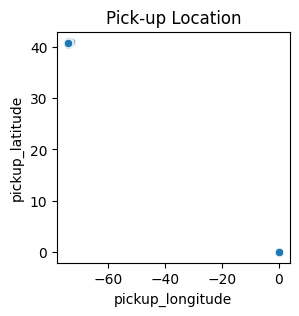

In [18]:
plt.figure(figsize=(3,3))
sns.scatterplot( x=rawdf['pickup_longitude'], y=rawdf['pickup_latitude'])
plt.title('Pick-up Location')
plt.show()

In [19]:
rawdf[rawdf['pickup_latitude']==0]['pickup_longitude'].value_counts()

0.0    477
Name: pickup_longitude, dtype: int64

In [20]:
rawdf[rawdf['pickup_longitude']==0]['pickup_latitude'].value_counts()

0.0    477
Name: pickup_latitude, dtype: int64

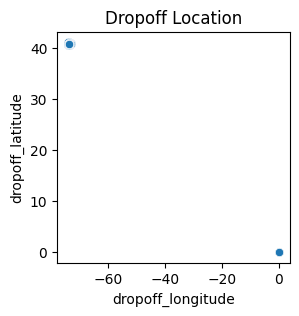

In [21]:
plt.figure(figsize=(3,3))
sns.scatterplot( x=rawdf['dropoff_longitude'], y=rawdf['dropoff_latitude'])
plt.title('Dropoff Location')
plt.show()

In [22]:
rawdf[rawdf['dropoff_longitude']==0]['dropoff_latitude'].value_counts()

0.0    444
Name: dropoff_latitude, dtype: int64

In [23]:
rawdf[rawdf['dropoff_latitude']==0]['dropoff_longitude'].value_counts()

0.0    444
Name: dropoff_longitude, dtype: int64

In [24]:
df = rawdf.loc[(rawdf['fare_amount']!=0) & (rawdf['passenger_count'] != 0) & (rawdf['trip_distance'] != 0) &
(rawdf['fare_amount']>0) & (rawdf['mta_tax']>0) & (rawdf['improvement_surcharge']>0) & (rawdf['total_amount']>0) &
(rawdf['pickup_longitude'] != 0) & (rawdf['dropoff_longitude'] != 0)]
df.shape

(27755, 23)

In [25]:
28454-27755

699

In [26]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.000000,27755.0,27755.000000,27755.000000,2.775500e+04,27755.000000
mean,14241.076311,1.539038,1.659773,2.842075,-73.974167,40.751104,1.021366,-73.973702,40.752186,1.328806,12.193511,0.330679,0.5,1.748339,0.267612,3.000000e-01,15.340142
std,8229.713164,0.498483,1.314251,3.436642,0.036765,0.027515,0.170660,0.033646,0.031702,0.483321,9.645162,0.433705,0.0,2.328050,1.222312,5.551215e-17,11.972937
min,1.000000,1.000000,1.000000,0.010000,-74.226357,40.494244,1.000000,-74.300552,40.524586,1.000000,2.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,3.300000
25%,7099.500000,1.000000,1.000000,1.000000,-73.991852,40.737461,1.000000,-73.991310,40.736269,1.000000,6.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,8.300000
50%,14228.000000,2.000000,1.000000,1.680000,-73.981873,40.753925,1.000000,-73.979958,40.754623,1.000000,9.000000,0.000000,0.5,1.360000,0.000000,3.000000e-01,11.750000
75%,21378.500000,2.000000,2.000000,3.100000,-73.967957,40.767899,1.000000,-73.963520,40.769653,2.000000,14.000000,0.500000,0.5,2.350000,0.000000,3.000000e-01,17.160000
max,28453.000000,2.000000,6.000000,37.900000,-73.552681,40.879341,5.000000,-73.238319,41.028622,4.000000,143.000000,4.500000,0.5,90.200000,23.580000,3.000000e-01,167.380000


### working with time series 
We have 2 datetime variables that are in 'object' format. In order to use them in our data, we need to change them into 'datetime' format.

In [27]:
pickup_dt = pd.to_datetime(df['tpep_pickup_datetime'])
pickup_dt

dropoff_dt = pd.to_datetime(df['tpep_dropoff_datetime'])
dropoff_dt

# dropyear_series = dropoff_dt.dt.year
# pickyear_series = pickup_dt.dt.year
# df['dropyear'] = dropyear_series
# df['pickyear'] = pickyear_series

# dropmonth_series = dropoff_dt.dt.month
# pickmonth_series = pickup_dt.dt.month
# df['dropmonth'] = dropmonth_series
# df['pickmonth'] = pickmonth_series

# dropday_series = dropoff_dt.dt.day
# pickday_series = pickup_dt.dt.day
# df['dropday'] = dropday_series
# df['pickday'] = pickday_series

dropdayname_series = dropoff_dt.dt.day_name()
pickdayname_series = pickup_dt.dt.day_name()
df['pickday'] = pickdayname_series
# df['dropday'] = dropdayname_series

C:\Users\niloo\AppData\Local\Temp\ipykernel_55076\852980388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickday'] = pickdayname_series


In [28]:
df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1) 


In [29]:
df.insert(loc=2, column='tpep_pickup_datetime', value = pickup_dt)
df.insert(loc=3, column='tpep_dropoff_datetime', value = dropoff_dt)


### Creating a new variable, Duration

In [30]:
duration =(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60
df.insert(loc=4, column='duraion_permin', value = duration)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27755 entries, 0 to 28452
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             27755 non-null  int64         
 1   VendorID               27755 non-null  int64         
 2   tpep_pickup_datetime   27755 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  27755 non-null  datetime64[ns]
 4   duraion_permin         27755 non-null  float64       
 5   passenger_count        27755 non-null  int64         
 6   trip_distance          27755 non-null  float64       
 7   pickup_longitude       27755 non-null  float64       
 8   pickup_latitude        27755 non-null  float64       
 9   RatecodeID             27755 non-null  int64         
 10  store_and_fwd_flag     27755 non-null  object        
 11  dropoff_longitude      27755 non-null  float64       
 12  dropoff_latitude       27755 non-null  float64       
 13  p

In [32]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duraion_permin,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,pickday
0,1,1,2016-02-19 20:50:15,2016-02-19 21:10:20,20.083333,1,11.20,-73.864700,40.770416,1,...,0.5,0.5,9.80,5.54,0.3,49.14,True,True,False,Friday
1,2,2,2016-02-19 20:50:53,2016-02-19 21:09:33,18.666667,3,6.38,-74.007317,40.727219,1,...,0.5,0.5,4.56,0.00,0.3,27.36,True,True,False,Friday
2,3,1,2016-02-19 20:51:08,2016-02-19 20:54:39,3.516667,1,0.60,-73.980736,40.765663,1,...,0.5,0.5,1.15,0.00,0.3,6.95,False,True,False,Friday
3,4,2,2016-02-19 20:51:39,2016-02-19 21:04:08,12.483333,5,2.83,-73.980087,40.764450,1,...,0.5,0.5,2.66,0.00,0.3,15.96,True,True,False,Friday
4,5,2,2016-02-19 20:52:21,2016-02-19 21:01:07,8.766667,1,2.48,-73.986664,40.766796,1,...,0.5,0.5,2.16,0.00,0.3,12.96,True,True,False,Friday


In [33]:
df['duraion_permin'].describe()

count    27755.000000
mean        14.902207
std         50.207117
min          0.000000
25%          6.400000
50%         10.616667
75%         17.050000
max       1438.666667
Name: duraion_permin, dtype: float64

In [34]:
df.loc[df['duraion_permin']==0]['fare_amount'].value_counts()

6.5     1
52.0    1
Name: fare_amount, dtype: int64

In [35]:
df = df.loc[df['duraion_permin']!=0]
df.shape

(27753, 25)

In [36]:
df.loc[df['fare_amount']<2.5]['fare_amount'].value_counts()

Series([], Name: fare_amount, dtype: int64)

## Changing the variable type

In [37]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
lencoder= LabelEncoder()
myencode= lencoder.fit_transform(df['store_and_fwd_flag'])
# replacing with previous columns
df.drop('store_and_fwd_flag', axis=1, inplace=True)
df['store_and_fwd_flag'] = myencode

In [39]:
# df['store_and_fwd_flag']= df['store_and_fwd_flag'].replace({'N':0 , 'Y':1})

In [40]:
from sklearn.preprocessing import LabelEncoder
lencoder= LabelEncoder()
myencode= lencoder.fit_transform(df['pickday'])
# replacing with previous columns
df.drop("pickday", axis=1, inplace=True)
df['pickday'] = myencode

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 0 to 28452
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             27753 non-null  int64         
 1   VendorID               27753 non-null  int64         
 2   tpep_pickup_datetime   27753 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  27753 non-null  datetime64[ns]
 4   duraion_permin         27753 non-null  float64       
 5   passenger_count        27753 non-null  int64         
 6   trip_distance          27753 non-null  float64       
 7   pickup_longitude       27753 non-null  float64       
 8   pickup_latitude        27753 non-null  float64       
 9   RatecodeID             27753 non-null  int64         
 10  dropoff_longitude      27753 non-null  float64       
 11  dropoff_latitude       27753 non-null  float64       
 12  payment_type           27753 non-null  int64         
 13  f

In [42]:
df.describe()

,Unnamed: 0,VendorID,duraion_permin,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,store_and_fwd_flag,pickday
count,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.000000,27753.0,27753.000000,27753.000000,2.775300e+04,27753.000000,27753.000000,27753.000000
mean,14241.442403,1.539041,14.903281,1.659640,2.841651,-73.974166,40.751105,1.021331,-73.973709,40.752190,1.328793,12.192282,0.330685,0.5,1.748045,0.267432,3.000000e-01,15.338443,0.005261,2.907578
std,8229.773296,0.498482,50.208767,1.314034,3.435709,0.036766,0.027516,0.170565,0.033628,0.031696,0.483318,9.642489,0.433715,0.0,2.327348,1.221945,5.551215e-17,11.968784,0.072341,2.002628
min,1.000000,1.000000,0.033333,1.000000,0.010000,-74.226357,40.494244,1.000000,-74.300552,40.524586,1.000000,2.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,3.300000,0.000000,0.000000
25%,7100.000000,1.000000,6.400000,1.000000,1.000000,-73.991852,40.737461,1.000000,-73.991310,40.736275,1.000000,6.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,8.300000,0.000000,1.000000
50%,14228.000000,2.000000,10.616667,1.000000,1.680000,-73.981873,40.753929,1.000000,-73.979958,40.754635,1.000000,9.000000,0.000000,0.5,1.360000,0.000000,3.000000e-01,11.750000,0.000000,3.000000
75%,21379.000000,2.000000,17.050000,2.000000,3.100000,-73.967957,40.767899,1.000000,-73.963524,40.769657,2.000000,14.000000,0.500000,0.5,2.350000,0.000000,3.000000e-01,17.160000,0.000000,5.000000
max,28453.000000,2.000000,1438.666667,6.000000,37.900000,-73.552681,40.879341,5.000000,-73.238319,41.028622,4.000000,143.000000,4.500000,0.5,90.200000,23.580000,3.000000e-01,167.380000,1.000000,6.000000


## Near to Zero variance variables

In [43]:
df_numeric = df.select_dtypes(include=np.number)

In [44]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit_transform(df_numeric)
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 18,
       19], dtype=int64)

In [45]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 0 to 28452
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27753 non-null  int64  
 1   VendorID               27753 non-null  int64  
 2   duraion_permin         27753 non-null  float64
 3   passenger_count        27753 non-null  int64  
 4   trip_distance          27753 non-null  float64
 5   pickup_longitude       27753 non-null  float64
 6   pickup_latitude        27753 non-null  float64
 7   RatecodeID             27753 non-null  int64  
 8   dropoff_longitude      27753 non-null  float64
 9   dropoff_latitude       27753 non-null  float64
 10  payment_type           27753 non-null  int64  
 11  fare_amount            27753 non-null  float64
 12  extra                  27753 non-null  float64
 13  mta_tax                27753 non-null  float64
 14  tip_amount             27753 non-null  float64
 15  to

### Dropping near to zero and unnecessary Columns

In [46]:
df = df.drop(['mta_tax', 'improvement_surcharge', 'Unnamed: 0'],axis=1)
# 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'

In [47]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duraion_permin,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,...,fare_amount,extra,tip_amount,tolls_amount,total_amount,GoodTip,Extra,Cash,store_and_fwd_flag,pickday
0,1,2016-02-19 20:50:15,2016-02-19 21:10:20,20.083333,1,11.20,-73.864700,40.770416,1,-73.924011,...,32.5,0.5,9.80,5.54,49.14,True,True,False,0,0
1,2,2016-02-19 20:50:53,2016-02-19 21:09:33,18.666667,3,6.38,-74.007317,40.727219,1,-73.967018,...,21.5,0.5,4.56,0.00,27.36,True,True,False,0,0
2,1,2016-02-19 20:51:08,2016-02-19 20:54:39,3.516667,1,0.60,-73.980736,40.765663,1,-73.988274,...,4.5,0.5,1.15,0.00,6.95,False,True,False,0,0
3,2,2016-02-19 20:51:39,2016-02-19 21:04:08,12.483333,5,2.83,-73.980087,40.764450,1,-73.967499,...,12.0,0.5,2.66,0.00,15.96,True,True,False,0,0
4,2,2016-02-19 20:52:21,2016-02-19 21:01:07,8.766667,1,2.48,-73.986664,40.766796,1,-73.972946,...,9.5,0.5,2.16,0.00,12.96,True,True,False,0,0


In [48]:
df.shape

(27753, 22)

## Checking the linear correlation of variables

In [49]:
corr_matrix = df.corr()
corr_matrix['Extra'].sort_values(ascending = False)

Extra                 1.000000
extra                 0.788995
GoodTip               0.055842
dropoff_longitude     0.033074
tip_amount            0.010252
trip_distance         0.009459
total_amount          0.008006
pickday               0.006360
VendorID             -0.002636
passenger_count      -0.002936
duraion_permin       -0.006169
store_and_fwd_flag   -0.007480
fare_amount          -0.022386
payment_type         -0.032448
Cash                 -0.037907
dropoff_latitude     -0.041754
tolls_amount         -0.044502
pickup_longitude     -0.061198
pickup_latitude      -0.064492
RatecodeID           -0.081118
Name: Extra, dtype: float64

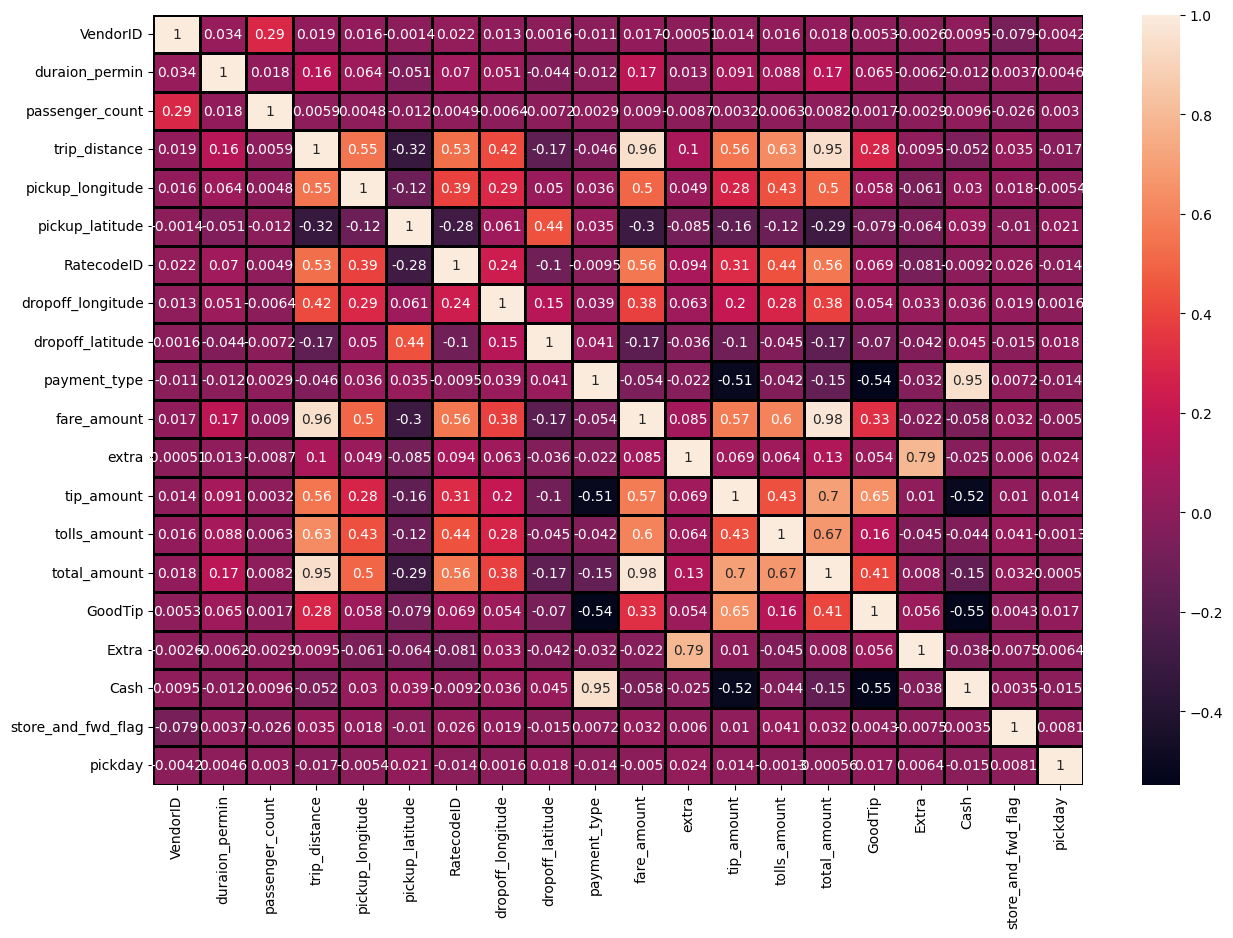

In [50]:
plt.figure(figsize=(15,10))
# sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10}, linewidth=1, linecolor="black")
plt.show()

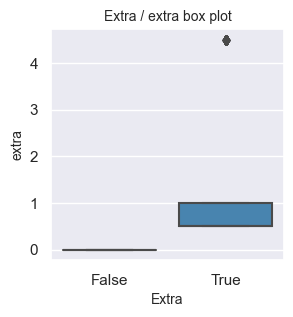

In [52]:
sns.set(font_scale=1)
plt.figure(figsize=(3, 3))
sns.boxplot(x = df['Extra'], y = df['extra'], palette="Blues")
plt.xlabel('Extra', fontsize=10)
plt.ylabel('extra', fontsize=10)
plt.title('Extra / extra box plot',fontsize=10)
plt.show()

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

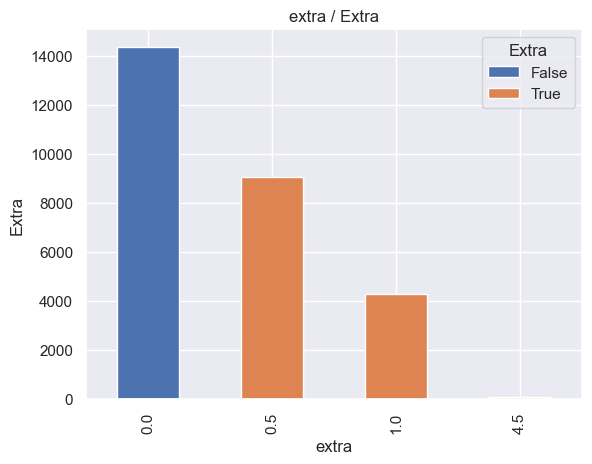

In [58]:
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['extra'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('extra / Extra')
plt.xlabel('extra')
plt.ylabel('Extra')

## RFC with extra

In [119]:
x = df_numeric
y = df['Extra']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))
score = model.score(xtest, ytest)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2902
        True       1.00      1.00      1.00      2649

    accuracy                           1.00      5551
   macro avg       1.00      1.00      1.00      5551
weighted avg       1.00      1.00      1.00      5551



Text(0, 0.5, 'True Positive Rate')

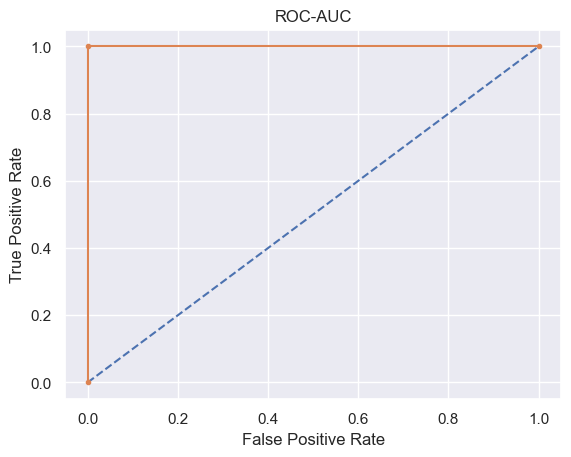

In [120]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest, ypred)
auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
fpr
tpr
thresholds
plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## RFC without extra

In [121]:
x = df_numeric.drop('extra',axis=1)
y = df['Extra']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))
score = model.score(xtest, ytest)

              precision    recall  f1-score   support

       False       0.78      0.85      0.82      2902
        True       0.82      0.75      0.78      2649

    accuracy                           0.80      5551
   macro avg       0.80      0.80      0.80      5551
weighted avg       0.80      0.80      0.80      5551



Text(0, 0.5, 'True Positive Rate')

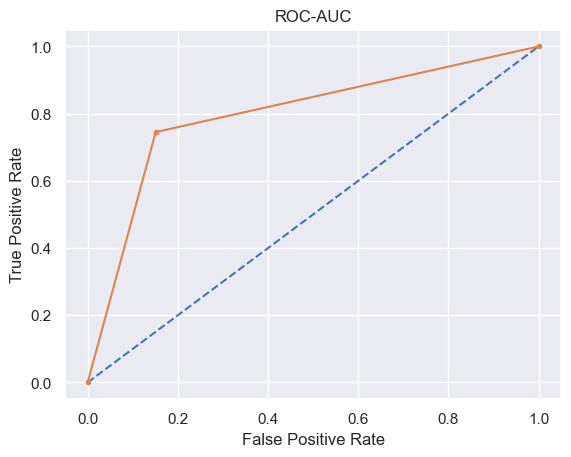

In [122]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest, ypred)
auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
fpr
tpr
thresholds
plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [444]:
float_df = df.select_dtypes(include='float')
float_df.columns

Index(['duraion_permin', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')

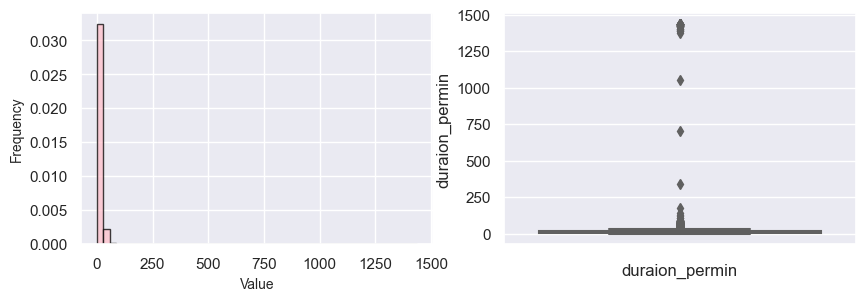

In [445]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['duraion_permin']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='duraion_permin', data=df,palette="Blues")
plt.xlabel('duraion_permin')
plt.show()

In [515]:
dur = df.loc[df['duraion_permin']>60]
dur.shape

(144, 22)

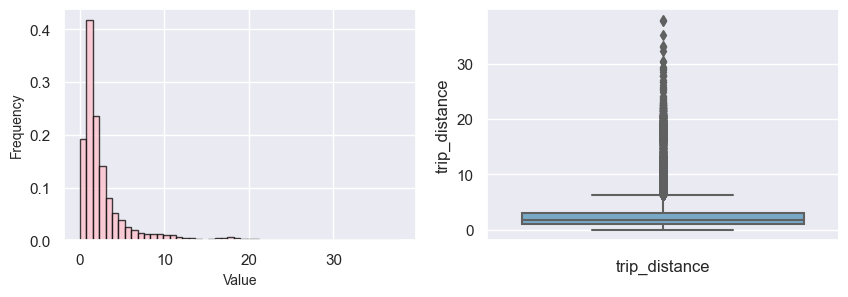

In [447]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['trip_distance']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='trip_distance', data=df,palette="Blues")
plt.xlabel('trip_distance')
plt.show()

In [514]:
dis = df.loc[df['trip_distance']>20]
dis.shape

(123, 22)

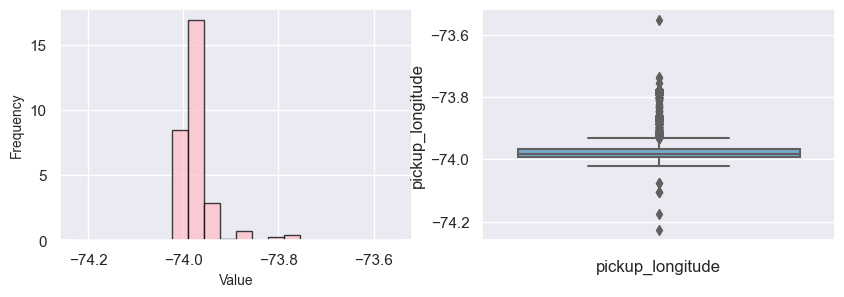

In [449]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['pickup_longitude']) , density=True , bins=20, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='pickup_longitude', data=df,palette="Blues")
plt.xlabel('pickup_longitude')
plt.show()

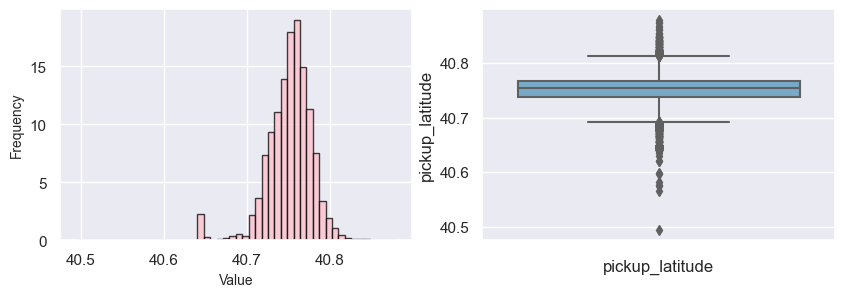

In [450]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['pickup_latitude']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='pickup_latitude', data=df,palette="Blues")
plt.xlabel('pickup_latitude')
plt.show()

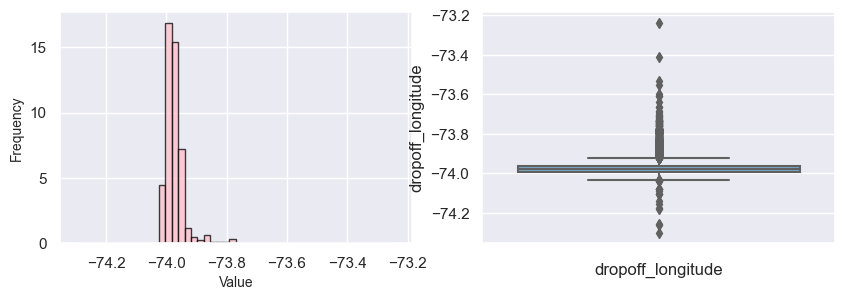

In [451]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['dropoff_longitude']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='dropoff_longitude', data=df,palette="Blues")
plt.xlabel('dropoff_longitude')
plt.show()

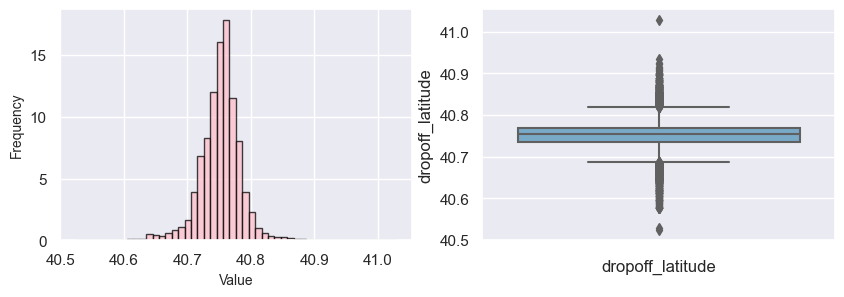

In [452]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['dropoff_latitude']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='dropoff_latitude', data=df,palette="Blues")
plt.xlabel('dropoff_latitude')
plt.show()

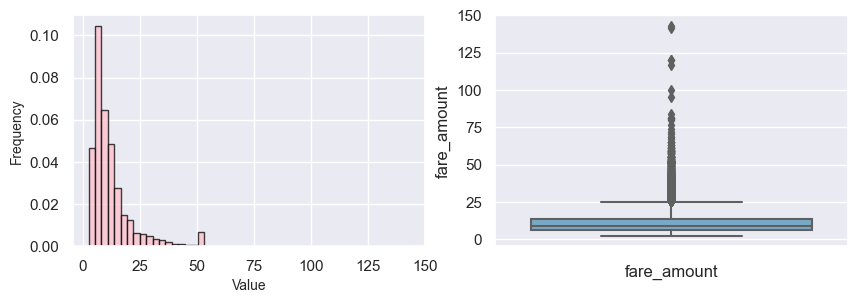

In [453]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['fare_amount']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='fare_amount', data=df,palette="Blues")
plt.xlabel('fare_amount')
plt.show()


In [513]:
fare = df.loc[df['fare_amount']>52]
fare.shape

(90, 22)

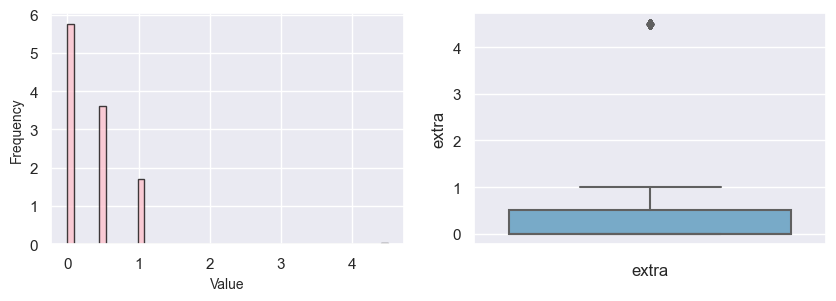

In [455]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['extra']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='extra', data=df ,palette="Blues")
plt.xlabel('extra')
plt.show()

In [512]:
ext = df.loc[df['extra']>1]
ext.shape

(85, 22)

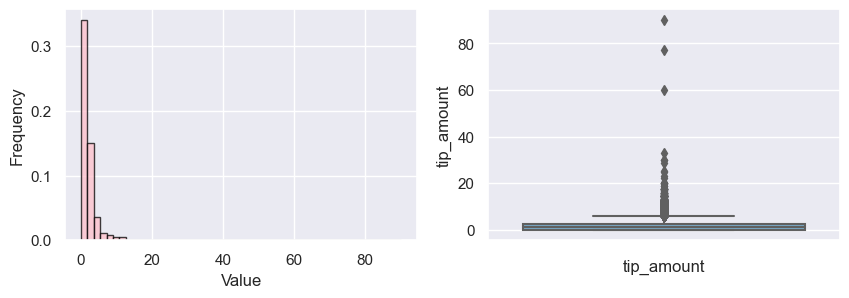

In [457]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['tip_amount']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y ='tip_amount', data=df,palette="Blues")
plt.xlabel('tip_amount')

plt.show()

In [511]:
tip = df.loc[df['tip_amount']>15]
tip.shape

(40, 22)

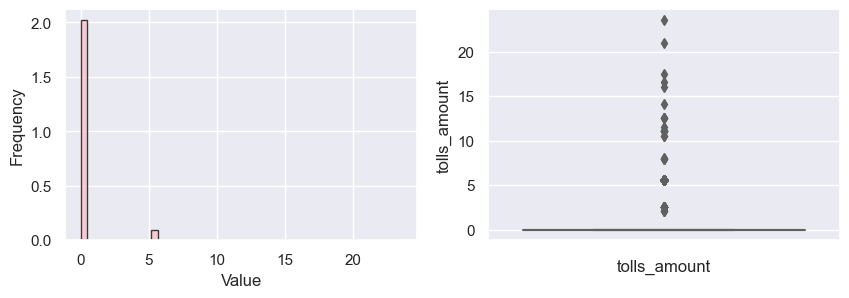

In [459]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['tolls_amount']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y ='tolls_amount', data=df,palette="Blues")
plt.xlabel('tolls_amount')

plt.show()

In [67]:
toll = df.loc[df['tolls_amount']>5.54]
toll.shape

(24, 22)

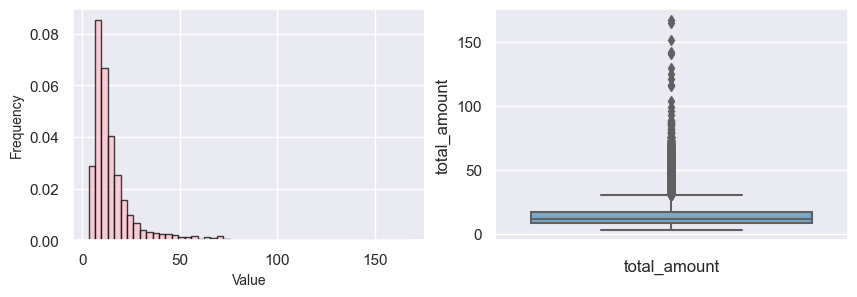

In [461]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['total_amount']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='total_amount', data=df,palette="Blues")
plt.xlabel('total_amount')
plt.show()

In [465]:
int_df = df.select_dtypes(include='integer')
int_df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'payment_type',
       'store_and_fwd_flag', 'pickday'],
      dtype='object')

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

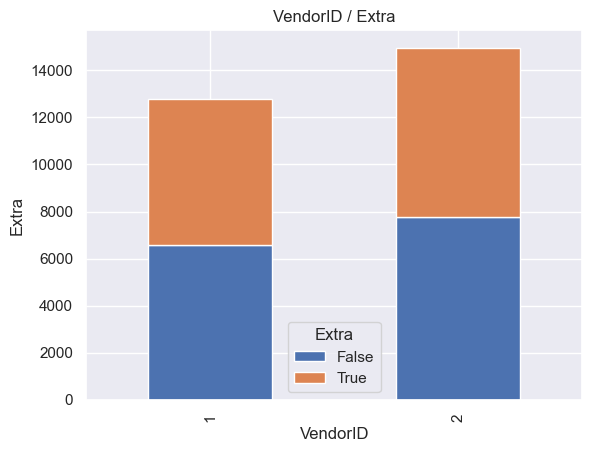

In [466]:
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['VendorID'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('VendorID / Extra')
plt.xlabel('VendorID')
plt.ylabel('Extra')

In [467]:
df['VendorID'].value_counts()

2    14960
1    12793
Name: VendorID, dtype: int64

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

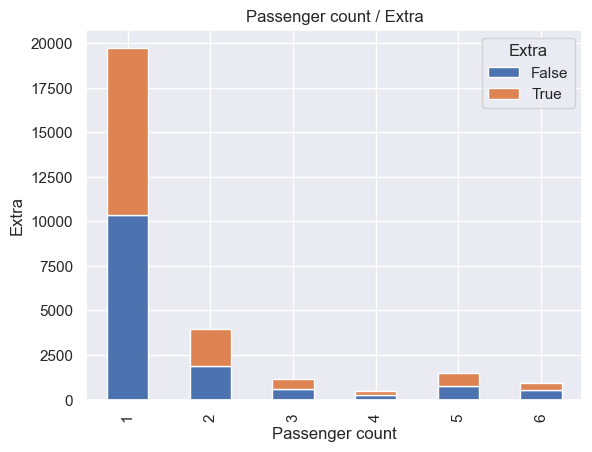

In [468]:
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['passenger_count'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('Passenger count / Extra')
plt.xlabel('Passenger count')
plt.ylabel('Extra')

In [469]:
df['passenger_count'].value_counts()

1    19751
2     3954
5     1471
3     1136
6      937
4      504
Name: passenger_count, dtype: int64

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

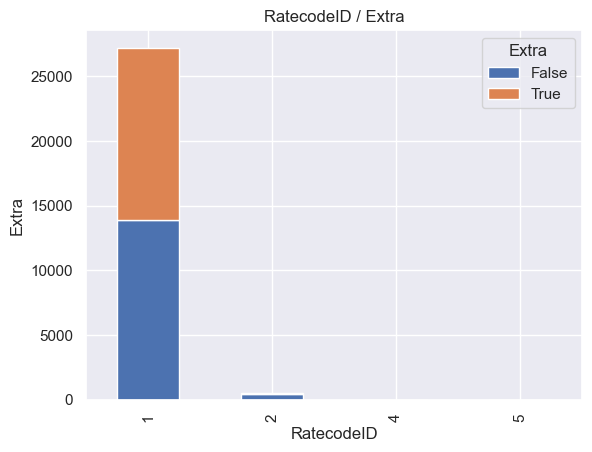

In [470]:
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['RatecodeID'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('RatecodeID / Extra')
plt.xlabel('RatecodeID')
plt.ylabel('Extra')

In [471]:
df['RatecodeID'].value_counts()

1    27223
2      506
5       14
4       10
Name: RatecodeID, dtype: int64

<Figure size 500x500 with 0 Axes>

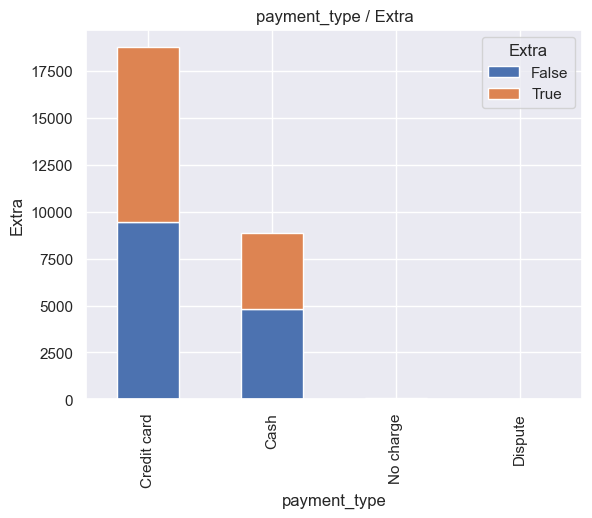

In [472]:
paymentlabels = ['Credit card','Cash','No charge', 'Dispute']
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['payment_type'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('payment_type / Extra')
plt.xlabel('payment_type')
plt.ylabel('Extra')
plt.xticks(np.arange(4),paymentlabels);

In [473]:
df['payment_type'].value_counts()

1    18770
2     8878
3       68
4       37
Name: payment_type, dtype: int64

<Figure size 500x500 with 0 Axes>

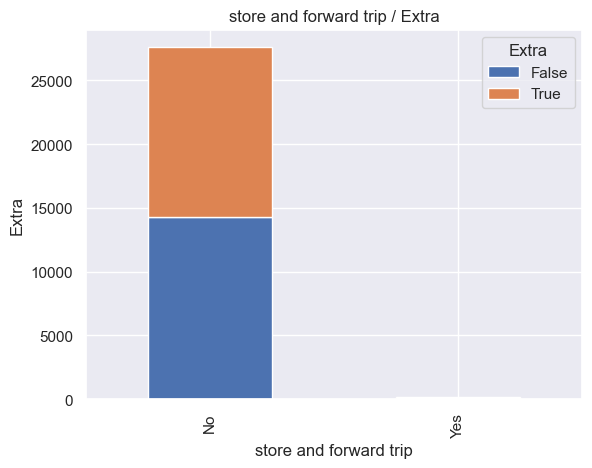

In [474]:
Flaglabels = ['No', 'Yes']
plt.figure(figsize=(5,5))
valuetable = pd.crosstab(df['store_and_fwd_flag'],df['Extra']) # ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('store and forward trip / Extra')
plt.xlabel('store and forward trip')
plt.ylabel('Extra')
plt.xticks(np.arange(2),Flaglabels);

In [475]:
df['store_and_fwd_flag'].value_counts()

0    27607
1      146
Name: store_and_fwd_flag, dtype: int64

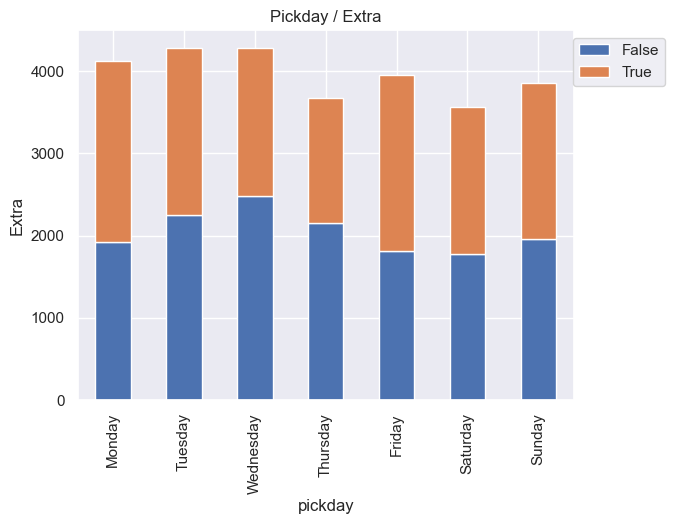

In [476]:
Daylabels = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
valuetable = pd.crosstab(df['pickday'],df['Extra']) # check normalize ,normalize='index'
valuetable.plot.bar(stacked=True)
plt.title('Pickday / Extra')
plt.xlabel('pickday')
plt.ylabel('Extra')
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right')
plt.xticks(np.arange(7),Daylabels);


In [477]:
df['pickday'].value_counts()

2    4288
1    4283
0    4127
4    3952
6    3862
3    3675
5    3566
Name: pickday, dtype: int64

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

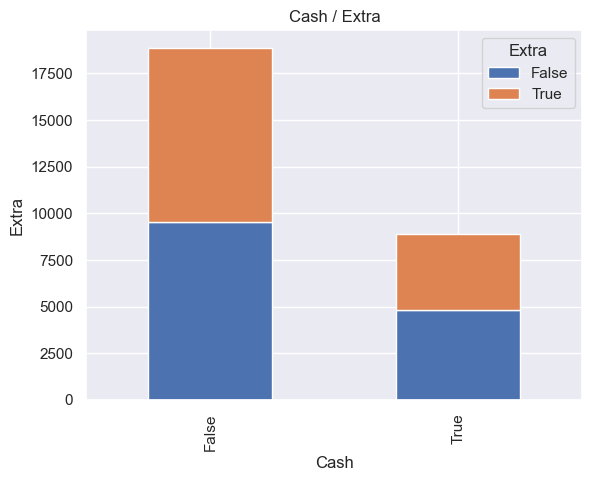

In [478]:
plt.figure(figsize=(5, 5))
valuetable = pd.crosstab(df['Cash'],df['Extra']) # check normalize
valuetable.plot.bar(stacked=True)
plt.title('Cash / Extra')
plt.xlabel('Cash')
plt.ylabel('Extra')

In [479]:
df['Cash'].value_counts()

False    18875
True      8878
Name: Cash, dtype: int64

Text(0, 0.5, 'Extra')

<Figure size 500x500 with 0 Axes>

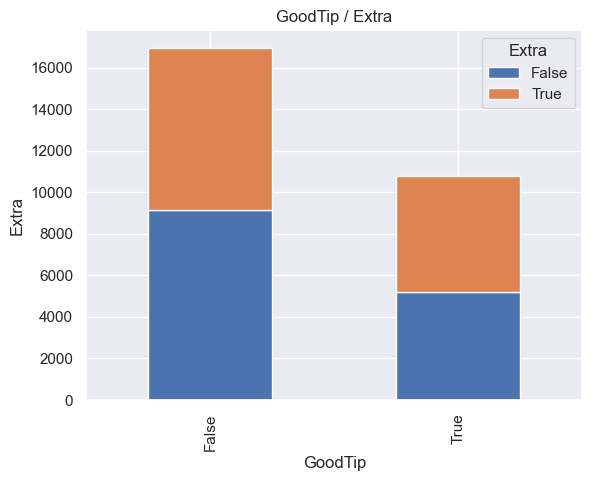

In [480]:
plt.figure(figsize=(5, 5))
valuetable = pd.crosstab(df['GoodTip'],df['Extra']) # check normalize
valuetable.plot.bar(stacked=True)
plt.title('GoodTip / Extra')
plt.xlabel('GoodTip')
plt.ylabel('Extra')

In [481]:
df['GoodTip'].value_counts()

False    16959
True     10794
Name: GoodTip, dtype: int64

In [66]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 0 to 28452
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27753 non-null  int64  
 1   VendorID               27753 non-null  int64  
 2   duraion_permin         27753 non-null  float64
 3   passenger_count        27753 non-null  int64  
 4   trip_distance          27753 non-null  float64
 5   pickup_longitude       27753 non-null  float64
 6   pickup_latitude        27753 non-null  float64
 7   RatecodeID             27753 non-null  int64  
 8   dropoff_longitude      27753 non-null  float64
 9   dropoff_latitude       27753 non-null  float64
 10  payment_type           27753 non-null  int64  
 11  fare_amount            27753 non-null  float64
 12  extra                  27753 non-null  float64
 13  mta_tax                27753 non-null  float64
 14  tip_amount             27753 non-null  float64
 15  to

## check if our target variable is imbalanced

In [96]:
df['Extra'].unique()
df['Extra'].value_counts()

False    14351
True     13402
Name: Extra, dtype: int64

## Choosing the model using 10-fold Cross validation and based on the accuracy metric

In [95]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x = df.drop(['Extra','extra','tpep_pickup_datetime','tpep_dropoff_datetime', 'store_and_fwd_flag'], axis=1)
y = df['Extra']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1)))


results = []
names = []
# scoring = 'accuracy' or 'roc_auc' or 'precision'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LR: 0.999685 (0.000288)
LDA: 0.996802 (0.000792)
KNN: 0.724124 (0.010515)
DTC: 0.760876 (0.021105)
RFM: 0.807765 (0.005760)


## Encoding Boolean variables

In [518]:
from sklearn.preprocessing import LabelEncoder
lencoder= LabelEncoder()
myencode= lencoder.fit_transform(df['Extra'])
# replacing with previous columns
df.drop('Extra', axis=1, inplace=True)
df['Extra'] = myencode

lencoder= LabelEncoder()
myencode= lencoder.fit_transform(df['Cash'])
# replacing with previous columns
df.drop('Cash', axis=1, inplace=True)
df['Cash'] = myencode

lencoder= LabelEncoder()
myencode= lencoder.fit_transform(df['GoodTip'])
# replacing with previous columns
df.drop('GoodTip', axis=1, inplace=True)
df['GoodTip'] = myencode

## fitting model by dropping columns

In [113]:
x = df.drop(['Extra','extra','tpep_dropoff_datetime','tpep_pickup_datetime', 'store_and_fwd_flag'], axis=1)
y = df['Extra']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver= 'lbfgs', penalty='l2', C= 0.3, n_jobs=-1) # C: inverse of regularization, smaller value, stronger regularization

model.fit(xtrain , ytrain)

LogisticRegression(C=0.3, n_jobs=-1)

In [99]:
# K fold
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, xtrain, ytrain, cv =k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99954975 1.         0.99954955 1.         0.99864865 0.99864865
 1.         1.         1.         0.9990991 ]
Average CV Score:  0.9995495698309748
Number of CV Scores used in Average:  10


In [114]:
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)
cm

array([[2896,    6],
       [  37, 2612]], dtype=int64)

In [115]:
ytest.value_counts()

False    2902
True     2649
Name: Extra, dtype: int64

In [101]:
print(classification_report(ytest, ypred))
score = model.score(xtest, ytest)

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2902
        True       1.00      0.99      0.99      2649

    accuracy                           0.99      5551
   macro avg       0.99      0.99      0.99      5551
weighted avg       0.99      0.99      0.99      5551



In [117]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
column_name= ['Dependent Variable','Coefficient']
coefficients.columns = column_name
new_row = {'Dependent Variable':'Intercept', 'Coefficient': model.intercept_}
coefficients = coefficients.append(new_row, ignore_index=True)
coefficients

C:\Users\niloo\AppData\Local\Temp\ipykernel_55076\10378058.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefficients = coefficients.append(new_row, ignore_index=True)


,Dependent Variable,Coefficient
0,VendorID,-0.173333
1,duraion_permin,-0.00967
2,passenger_count,0.061812
3,trip_distance,1.536051
4,pickup_longitude,-0.380781
5,pickup_latitude,-0.301117
6,RatecodeID,-2.200709
7,dropoff_longitude,0.189452
8,dropoff_latitude,-0.279441
9,payment_type,0.549883


Text(0, 0.5, 'True Positive Rate')

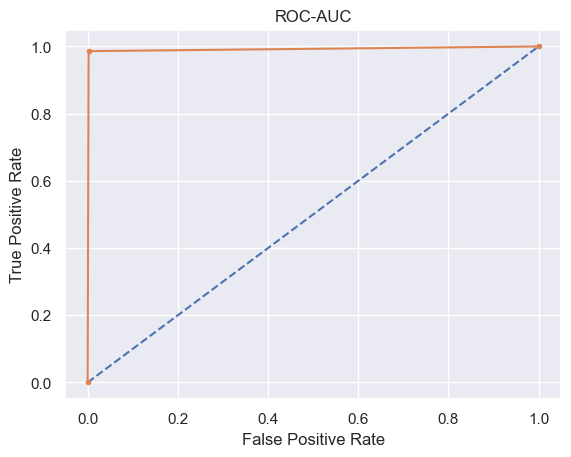

In [116]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest, ypred)
auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
fpr
tpr
thresholds
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [118]:
auc = roc_auc_score(ytest, model.predict(xtest))
auc

0.9919824627266599

In [106]:
x = df.drop(['Extra','extra','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag',
'RatecodeID','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'VendorID',
'duraion_permin', 'passenger_count','payment_type','trip_distance','Cash','pickday','GoodTip'], axis=1)
y = df['Extra']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver= 'lbfgs', penalty='l2', C= 0.3, n_jobs=-1) # C: inverse of regularization, smaller value, stronger regularization

model.fit(xtrain , ytrain)
ypred = model.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(classification_report(ytest, ypred))
score = model.score(xtest, ytest)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2902
        True       1.00      1.00      1.00      2649

    accuracy                           1.00      5551
   macro avg       1.00      1.00      1.00      5551
weighted avg       1.00      1.00      1.00      5551



In [109]:
cm

array([[2902,    0],
       [   0, 2649]], dtype=int64)

In [527]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
column_name= ['Dependent Variable','Coefficient']
coefficients.columns = column_name
new_row = {'Dependent Variable':'Intercept', 'Coefficient': model.intercept_}
coefficients = coefficients.append(new_row, ignore_index=True)
coefficients

C:\Users\niloo\AppData\Local\Temp\ipykernel_36384\10378058.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefficients = coefficients.append(new_row, ignore_index=True)


,Dependent Variable,Coefficient
0,fare_amount,-12.948226
1,tip_amount,-12.915728
2,tolls_amount,-12.940069
3,total_amount,12.942052
4,Intercept,[-13.797178779536498]


Text(0, 0.5, 'True Positive Rate')

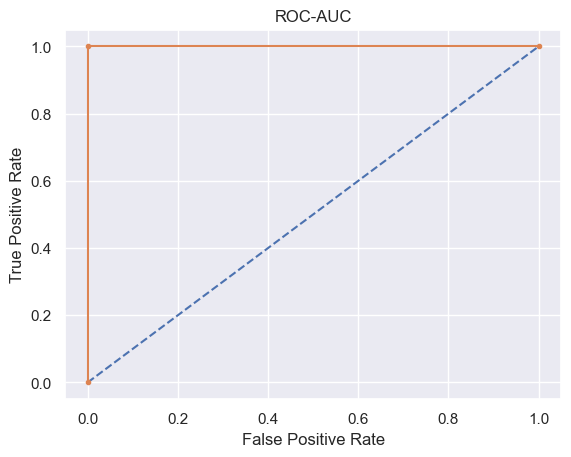

In [111]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest, ypred)
auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
fpr
tpr
thresholds
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [107]:
auc = roc_auc_score(ytest, model.predict(xtest))
auc

1.0